In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import cross_validation
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor   #Decision Tree Regressor
#import folium
import seaborn as sns

In [4]:
#Read in HCI databuild with missings filled in
cahouseurl = 'H:\data_science\CA_Housing\Code\ca_house_missing_filled.txt'
cahouse = pd.read_csv(cahouseurl, converters={'geotypevalue':str,'county_fips':str})
cahouse.head()

,Unnamed: 0,p_parkacc,pop2010,gini_index,median_hh_income,ave_fam_size,job_house_tot,job_match,ozone,pm25_conc,...,alc_on,nocar,hh_fam,placename,county,regionid,placefp,geoname,zri_sqft,hval_sqft
0,0,0.403765,7596.0,0.378,90888.0,3.44,0.529794,0.359886,39.357030,9.159316,...,4.805161,0.500000,81.8,Acton,Los Angeles,16677.0,212,Acton CDP,1.088,189.0
1,1,0.147017,31765.0,0.384,43305.0,4.01,0.428894,0.470604,25.333595,8.528040,...,3.988667,2.727502,83.8,Adelanto,San Bernardino,16684.0,296,Adelanto city,0.744,NaN
2,2,0.981702,20330.0,0.431,106886.0,2.75,1.368659,1.054467,1.333333,11.416087,...,25.809149,1.832013,76.9,Agoura Hills,Los Angeles,9840.0,394,Agoura Hills city,1.438,274.0
3,3,0.531915,1128.0,0.398,45702.0,3.89,0.049751,0.270270,22.666667,7.326466,...,3.014184,0.000000,73.9,Aguanga,Riverside,43832.0,464,Aguanga CDP,0.926,119.0
4,5,0.959207,73812.0,0.434,74221.0,3.13,0.747446,0.605977,0.000000,8.778190,...,47.717173,19.701688,60.3,Alameda,Alameda,16697.0,562,Alameda city,1.392,345.0


In [5]:
def scale_df(df):
    df_scale = preprocessing.scale(df)
    df_scale = pd.DataFrame(df_scale) 
    df_scale.columns = df.columns.values
    return df_scale

AllVariables = cahouse.columns.values
X1 = cahouse[AllVariables]
X1 = X1.drop(['placefp', 'geoname', 'placename', 'county', 'regionid', 'Unnamed: 0', 'hval_sqft'], axis = 1)
X1 = X1.dropna()
y1 = X1[['zri_sqft']]
X1 = X1.drop(['zri_sqft'], axis = 1)
X1_scale = scale_df(X1)
y1_scale = scale_df(y1)


X2 = cahouse[AllVariables]
X2 = X2.drop(['placefp', 'geoname', 'placename', 'county', 'regionid', 'Unnamed: 0', 'zri_sqft'], axis = 1)
X2 = X2.dropna()
y2 = X2[['hval_sqft']]
X2 = X2.drop(['hval_sqft'], axis = 1)
X2_scale = scale_df(X2)
y2_scale = scale_df(y2)

[(1e-10, 0.32618316702128836), (1.0000000000000001e-09, 0.32618316619840887), (1e-08, 0.32618315799118464), (9.9999999999999995e-08, 0.32618307607462127), (9.9999999999999995e-07, 0.3261822561490838), (1.0000000000000001e-05, 0.3261740757629078), (0.0001, 0.32610671546264669), (0.001, 0.32567131710861508), (0.01, 0.32667940599487766), (0.10000000000000001, 0.40470277726263931), (1.0, 1.0016548321260428), (10.0, 1.0016548321260428), (100.0, 1.0016548321260428), (1000.0, 1.0016548321260428), (10000.0, 1.0016548321260428), (100000.0, 1.0016548321260428), (1000000.0, 1.0016548321260428), (10000000.0, 1.0016548321260428), (100000000.0, 1.0016548321260428), (1000000000.0, 1.0016548321260428), (10000000000.0, 1.0016548321260428)]


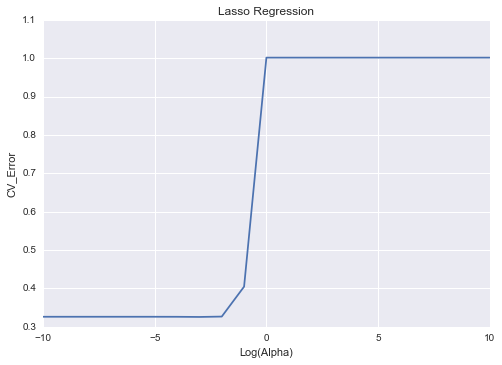

In [6]:
MSE_Lasso_CV = []
alphas = np.logspace(-10, 10, 21)
alphas_index = np.linspace(-10, 10, 21)

CV_Scores = []

for a in alphas:
    lm = linear_model.Lasso(alpha=a)
    CV_Scores.append(- cross_val_score(lm, X1_scale, y1_scale, cv=10, 
                     scoring = 'mean_squared_error').mean())



print(zip(alphas, CV_Scores))

plt.plot(alphas_index, CV_Scores)
plt.xlabel("Log(Alpha)")
plt.ylabel("CV_Error")
plt.title("Lasso Regression")
plt.show()

[(1e-10, 0.23852781800623796), (1.0000000000000001e-09, 0.23852781767545705), (1e-08, 0.23852781442906273), (9.9999999999999995e-08, 0.23852778188799845), (9.9999999999999995e-07, 0.23852744615611851), (1.0000000000000001e-05, 0.23852419968842226), (0.0001, 0.23849248540686366), (0.001, 0.23823501281226581), (0.01, 0.24168330235937191), (0.10000000000000001, 0.28782818058052512), (1.0, 1.0051832839163786), (10.0, 1.0051832839163786), (100.0, 1.0051832839163786), (1000.0, 1.0051832839163786), (10000.0, 1.0051832839163786), (100000.0, 1.0051832839163786), (1000000.0, 1.0051832839163786), (10000000.0, 1.0051832839163786), (100000000.0, 1.0051832839163786), (1000000000.0, 1.0051832839163786), (10000000000.0, 1.0051832839163786)]


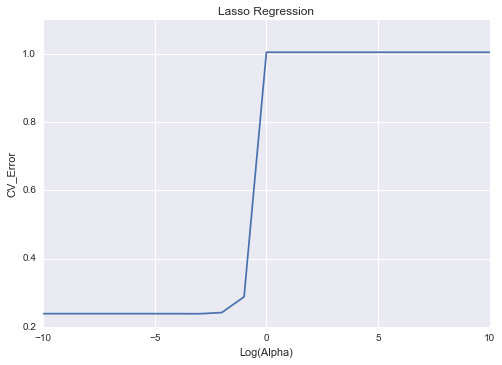

In [7]:
MSE_Lasso_CV = []
alphas = np.logspace(-10, 10, 21)
alphas_index = np.linspace(-10, 10, 21)

CV_Scores = []

for a in alphas:
    lm = linear_model.Lasso(alpha=a)
    CV_Scores.append(- cross_val_score(lm, X2_scale, y2_scale, cv=10, 
                     scoring = 'mean_squared_error').mean())



print(zip(alphas, CV_Scores))

plt.plot(alphas_index, CV_Scores)
plt.xlabel("Log(Alpha)")
plt.ylabel("CV_Error")
plt.title("Lasso Regression")
plt.show()

In [8]:
lm = linear_model.Lasso(alpha=.1)
lm.fit(X1_scale, y1_scale)
print zip(lm.coef_,X1.columns)

[(0.0, 'p_parkacc'), (0.0, 'pop2010'), (0.20795812729968316, 'gini_index'), (0.44720760056050779, 'median_hh_income'), (-0.0, 'ave_fam_size'), (0.0, 'job_house_tot'), (0.0, 'job_match'), (-0.090324251433401725, 'ozone'), (-0.0, 'pm25_conc'), (0.0, 'p_hs_edatt'), (0.0, 'livewage_s'), (-0.0, 'poverty_all'), (-0.02605641463916528, 'unemp_rate'), (-0.0, 'voted'), (-0.0, 'bad_water'), (0.0, 'traf_sev'), (0.19133870725342031, 'alc_on'), (0.089500806693581181, 'nocar'), (-0.0, 'hh_fam')]


In [9]:
lm = linear_model.Lasso(alpha=.1)
lm.fit(X2_scale, y2_scale)
print zip(lm.coef_,X2.columns)

[(0.0, 'p_parkacc'), (-0.0, 'pop2010'), (0.16966569334494802, 'gini_index'), (0.54552681427934691, 'median_hh_income'), (-0.0, 'ave_fam_size'), (0.0, 'job_house_tot'), (0.0, 'job_match'), (-0.083656109746773927, 'ozone'), (-0.0, 'pm25_conc'), (0.0, 'p_hs_edatt'), (-0.0, 'livewage_s'), (-0.0, 'poverty_all'), (-0.072560062523991123, 'unemp_rate'), (0.0, 'voted'), (-0.0, 'bad_water'), (0.0, 'traf_sev'), (0.13164035835920049, 'alc_on'), (0.11377762283940009, 'nocar'), (-0.027765063112520298, 'hh_fam')]


In [10]:
cahouse = cahouse.drop(['p_parkacc', 'pop2010', 'ave_fam_size', 'job_house_tot', 'job_match',
                       'pm25_conc', 'p_hs_edatt', 'livewage_s', 'poverty_all', 'voted', 'bad_water', 
                        'traf_sev', 'placefp', 'regionid', 'Unnamed: 0'], axis=1)

In [11]:
cahouse.corr()

,gini_index,median_hh_income,ozone,unemp_rate,alc_on,nocar,hh_fam,zri_sqft,hval_sqft
gini_index,1.000000,0.221856,-0.100532,-0.172539,0.107323,0.237205,-0.390599,0.467566,0.453170
median_hh_income,0.221856,1.000000,-0.249393,-0.541331,-0.209535,-0.040366,0.131806,0.596431,0.702450
ozone,-0.100532,-0.249393,1.000000,0.281247,-0.284300,-0.216704,0.155282,-0.408161,-0.434045
unemp_rate,-0.172539,-0.541331,0.281247,1.000000,-0.081616,-0.130715,0.211283,-0.463636,-0.548989
alc_on,0.107323,-0.209535,-0.284300,-0.081616,1.000000,0.456477,-0.334005,0.296061,0.218222
nocar,0.237205,-0.040366,-0.216704,-0.130715,0.456477,1.000000,-0.387411,0.346758,0.332034
hh_fam,-0.390599,0.131806,0.155282,0.211283,-0.334005,-0.387411,1.000000,-0.245264,-0.233061
zri_sqft,0.467566,0.596431,-0.408161,-0.463636,0.296061,0.346758,-0.245264,1.000000,0.941801
hval_sqft,0.453170,0.702450,-0.434045,-0.548989,0.218222,0.332034,-0.233061,0.941801,1.000000


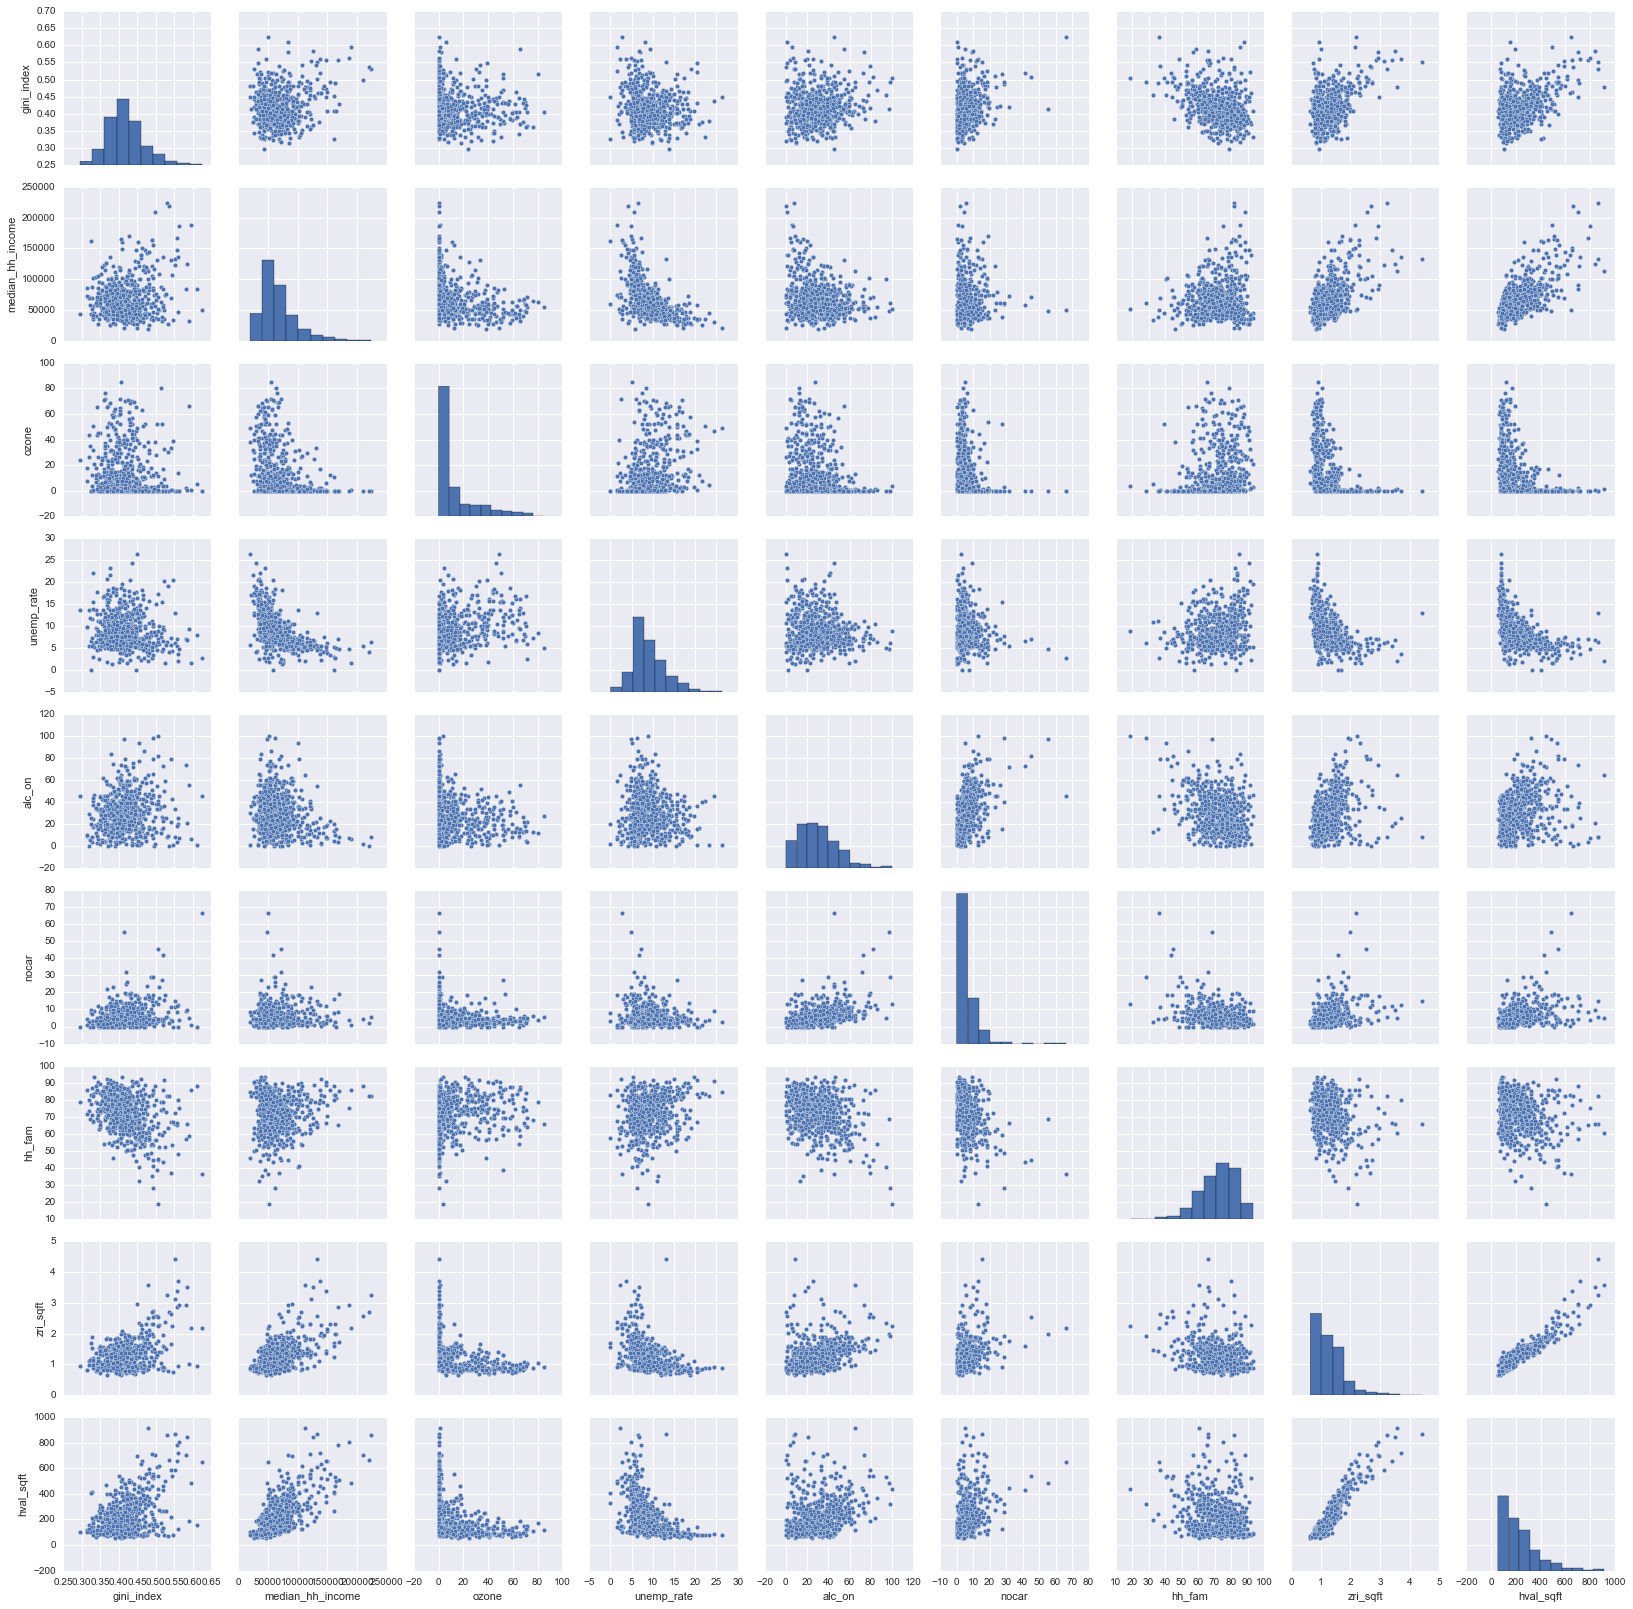

In [12]:
cahouse_plt = cahouse.copy()
cahouse_plt = cahouse.dropna()
sns.pairplot(cahouse_plt);

In [15]:
X = cahouse[['gini_index', 'median_hh_income', 'ozone', 'nocar']]
y1 = cahouse['zri_sqft']
y2 = cahouse['hval_sqft']

import statsmodels.formula.api as smf
lm = smf.ols(formula='y1 ~ X', data=cahouse).fit()
print lm.summary()
print("Coefficients:" , zip(X.columns.values, lm.params[1:9]))
print("P-Vales: ", zip(X.columns.values, lm.pvalues[1:9]))
lm = smf.ols(formula='y2 ~ X', data=cahouse).fit()
print lm.summary()
print("Coefficients:" , zip(X.columns.values, lm.params[1:9]))
print("P-Vales: ", zip(X.columns.values, lm.pvalues[1:9]))

ValueError: For numerical factors, num_columns must be an int

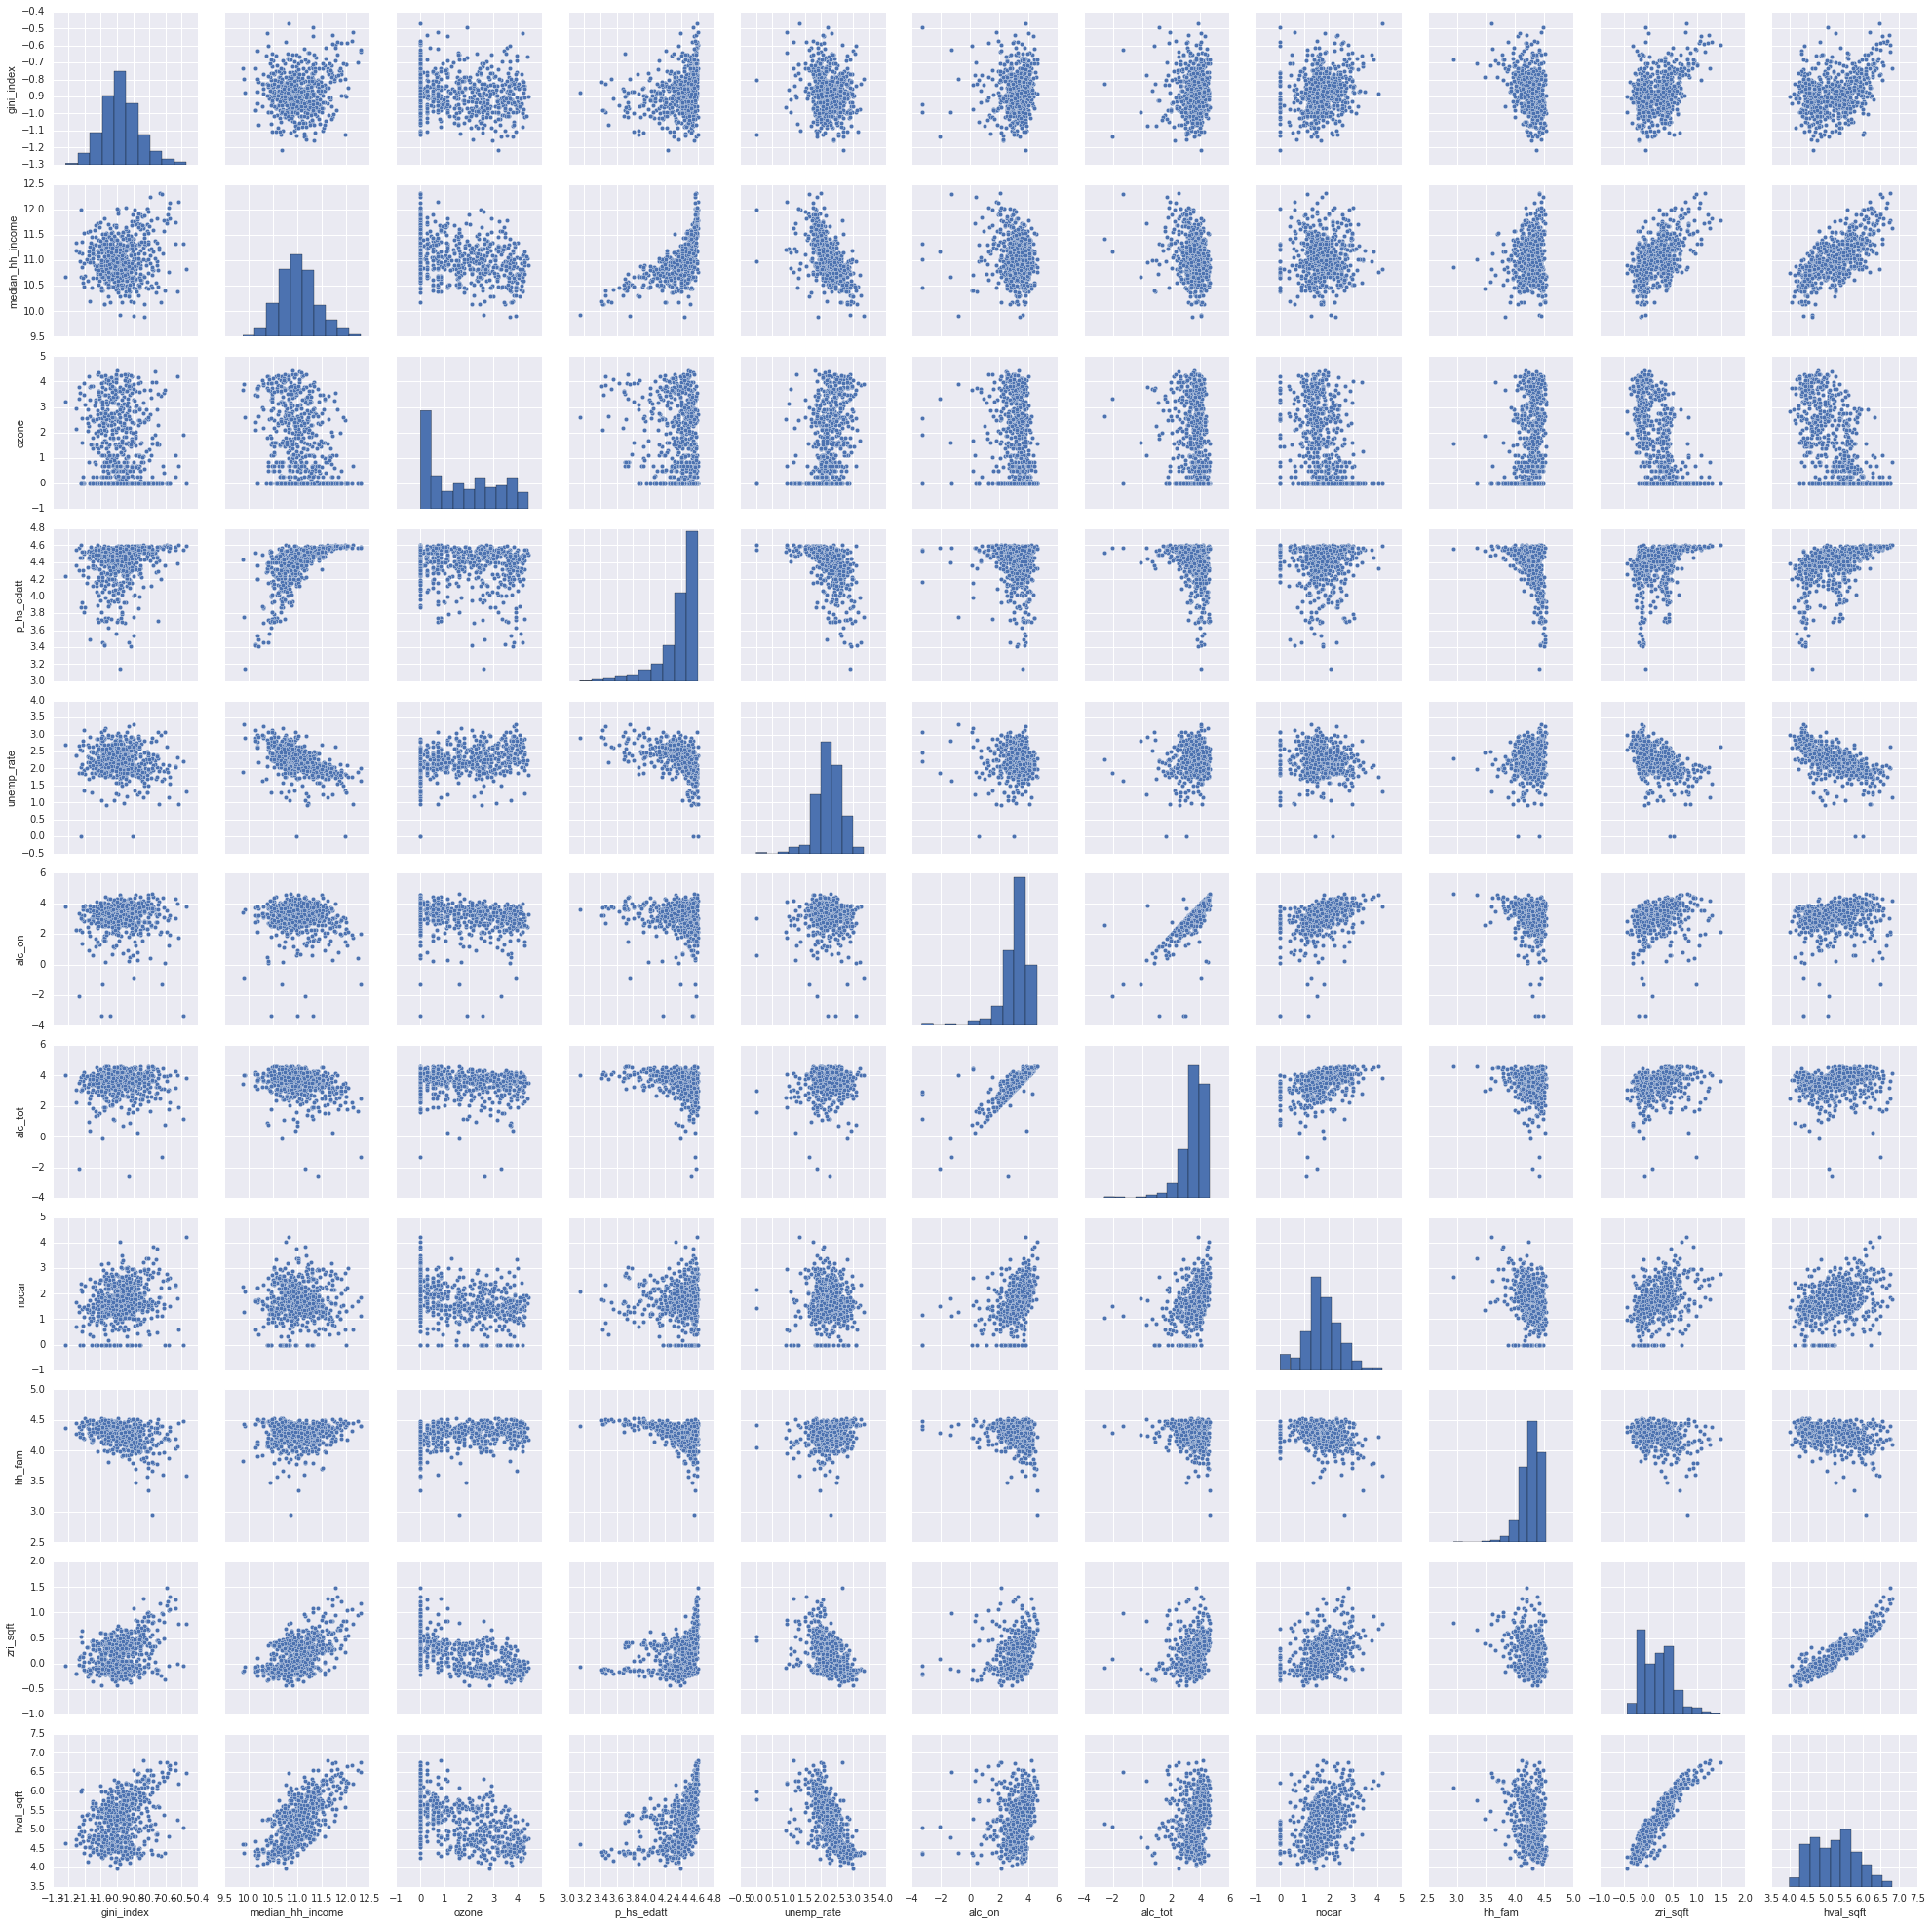

In [178]:
cahouse_log = cahouse_plt.copy()
cahouse_log = cahouse_log.drop(['placename', 'county', 'geoname'], axis=1)
#cahouse_log['gini_index'] = np.log(cahouse_log['gini_index'])
for i in cahouse_log.columns.values:
    imin = cahouse_log[i].min()
    if imin == 0:
        cahouse_log[i] = np.log(cahouse_log[i]+1)
    else:
        cahouse_log[i] = np.log(cahouse_log[i])
#cahouse_plt = cahouse.dropna()
sns.pairplot(cahouse_log);
#cahouse_log.head()

In [194]:
cahouse_log = cahouse.copy()
cahouse_log = cahouse_log.drop(['placename', 'county', 'geoname'], axis=1)
#cahouse_log['gini_index'] = np.log(cahouse_log['gini_index'])
for i in cahouse_log.columns.values:
    imin = cahouse_log[i].min()
    if imin == 0:
        cahouse_log[i] = np.log(cahouse_log[i]+1)
    else:
        cahouse_log[i] = np.log(cahouse_log[i])

X = cahouse_log[['gini_index', 'median_hh_income', 'ozone', 'p_hs_edatt', 'unemp_rate', 'alc_on', 'nocar', 'hh_fam']]
y1 = cahouse_log['zri_sqft']
y2 = cahouse_log['hval_sqft']

lm = smf.ols(formula='y1 ~ X', data=cahouse).fit()
print lm.summary()
print("Coefficients:" , zip(X.columns.values, lm.params[1:9]))
print("P-Vales: ", zip(X.columns.values, lm.pvalues[1:9]))
lm = smf.ols(formula='y2 ~ X', data=cahouse).fit()
print lm.summary()
print("Coefficients:" , zip(X.columns.values, lm.params[1:9]))
print("P-Vales: ", zip(X.columns.values, lm.pvalues[1:9]))
#cahouse_log.corr()

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     179.8
Date:                Sun, 14 Aug 2016   Prob (F-statistic):          3.31e-160
Time:                        23:46:46   Log-Likelihood:                 188.43
No. Observations:                 669   AIC:                            -358.9
Df Residuals:                     660   BIC:                            -318.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4877      0.368     -1.325      0.1

### def scale_df(df):
    df_scale = preprocessing.scale(df)
    df_scale = pd.DataFrame(df_scale) 
    df_scale.columns = df.columns.values
    return df_scale

AllVariables = cahouse.columns.values
X1 = cahouse[AllVariables]
X1 = X1.drop(['geoname', 'placename', 'county', 'hval_sqft'], axis = 1)
X1 = X1.dropna()
y1 = X1[['zri_sqft']]
X1 = X1.drop(['zri_sqft'], axis = 1)
X1_scale = scale_df(X1)
y1_scale = scale_df(y1)


X2 = cahouse[AllVariables]
X2 = X2.drop(['geoname', 'placename', 'county', 'zri_sqft'], axis = 1)
X2 = X2.dropna()
y2 = X2[['hval_sqft']]
X2 = X2.drop(['hval_sqft'], axis = 1)
X2_scale = scale_df(X2)
y2_scale = scale_df(y2)

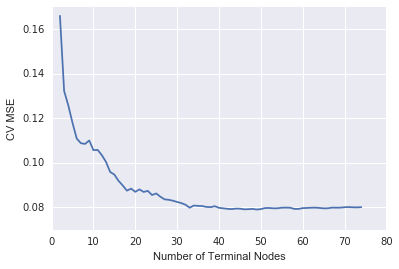

In [188]:
#Decision tree tuning, y1 (zri_sqft)
Maximum_Terminal_Nodes = range(2,75)
score = []
for i in Maximum_Terminal_Nodes :
        treereg = DecisionTreeRegressor(max_leaf_nodes = i, 
                                        min_samples_leaf = 5, 
                                        random_state = 24)  #You could set random_state to any number
        score.append(-cross_val_score(treereg, X1, y1, cv=10, scoring = 'mean_squared_error').mean())

plt.plot(Maximum_Terminal_Nodes, score)
plt.xlabel("Number of Terminal Nodes")
plt.ylabel("CV MSE")
plt.show()

In [189]:
#Decision Tree, y1 (zri_sqft)
CV_MSE_Min = np.argmin(score)
print Maximum_Terminal_Nodes[CV_MSE_Min]
treereg = DecisionTreeRegressor(max_leaf_nodes = Maximum_Terminal_Nodes[CV_MSE_Min], 
                                min_samples_leaf = 5, 
                                random_state = 24)
treereg.fit(X1,y1)
ImportanceDataFrame = pd.DataFrame({'feature':X1.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

49


,feature,importance
2,ozone,0.346878
0,gini_index,0.314171
3,p_hs_edatt,0.090534
4,unemp_rate,0.087986
7,nocar,0.057673
1,median_hh_income,0.043521
5,alc_on,0.032101
6,alc_tot,0.023781
8,hh_fam,0.003356


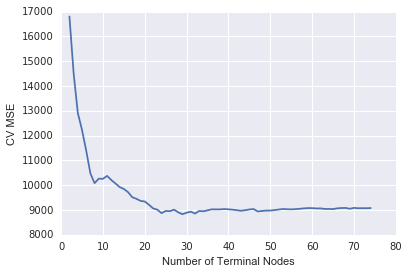

In [190]:
#Decision tree tuning, y2 (hval_sqft)
Maximum_Terminal_Nodes = range(2,75)
score = []
for i in Maximum_Terminal_Nodes :
        treereg = DecisionTreeRegressor(max_leaf_nodes = i, 
                                        min_samples_leaf = 5, 
                                        random_state = 24)  #You could set random_state to any number
        score.append(-cross_val_score(treereg, X2, y2, cv=10, scoring = 'mean_squared_error').mean())

plt.plot(Maximum_Terminal_Nodes, score)
plt.xlabel("Number of Terminal Nodes")
plt.ylabel("CV MSE")
plt.show()

In [191]:
#Decision Tree, y2 (hval_sqft)
CV_MSE_Min = np.argmin(score)
print Maximum_Terminal_Nodes[CV_MSE_Min]
treereg = DecisionTreeRegressor(max_leaf_nodes = Maximum_Terminal_Nodes[CV_MSE_Min], 
                                min_samples_leaf = 5, 
                                random_state = 24)
treereg.fit(X2,y2)
ImportanceDataFrame = pd.DataFrame({'feature':X2.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

29


,feature,importance
3,p_hs_edatt,0.392221
2,ozone,0.238454
0,gini_index,0.117293
1,median_hh_income,0.092551
4,unemp_rate,0.062924
5,alc_on,0.050437
6,alc_tot,0.034361
8,hh_fam,0.011758
7,nocar,0.000000


AttributeError: max must be larger than min in range parameter.

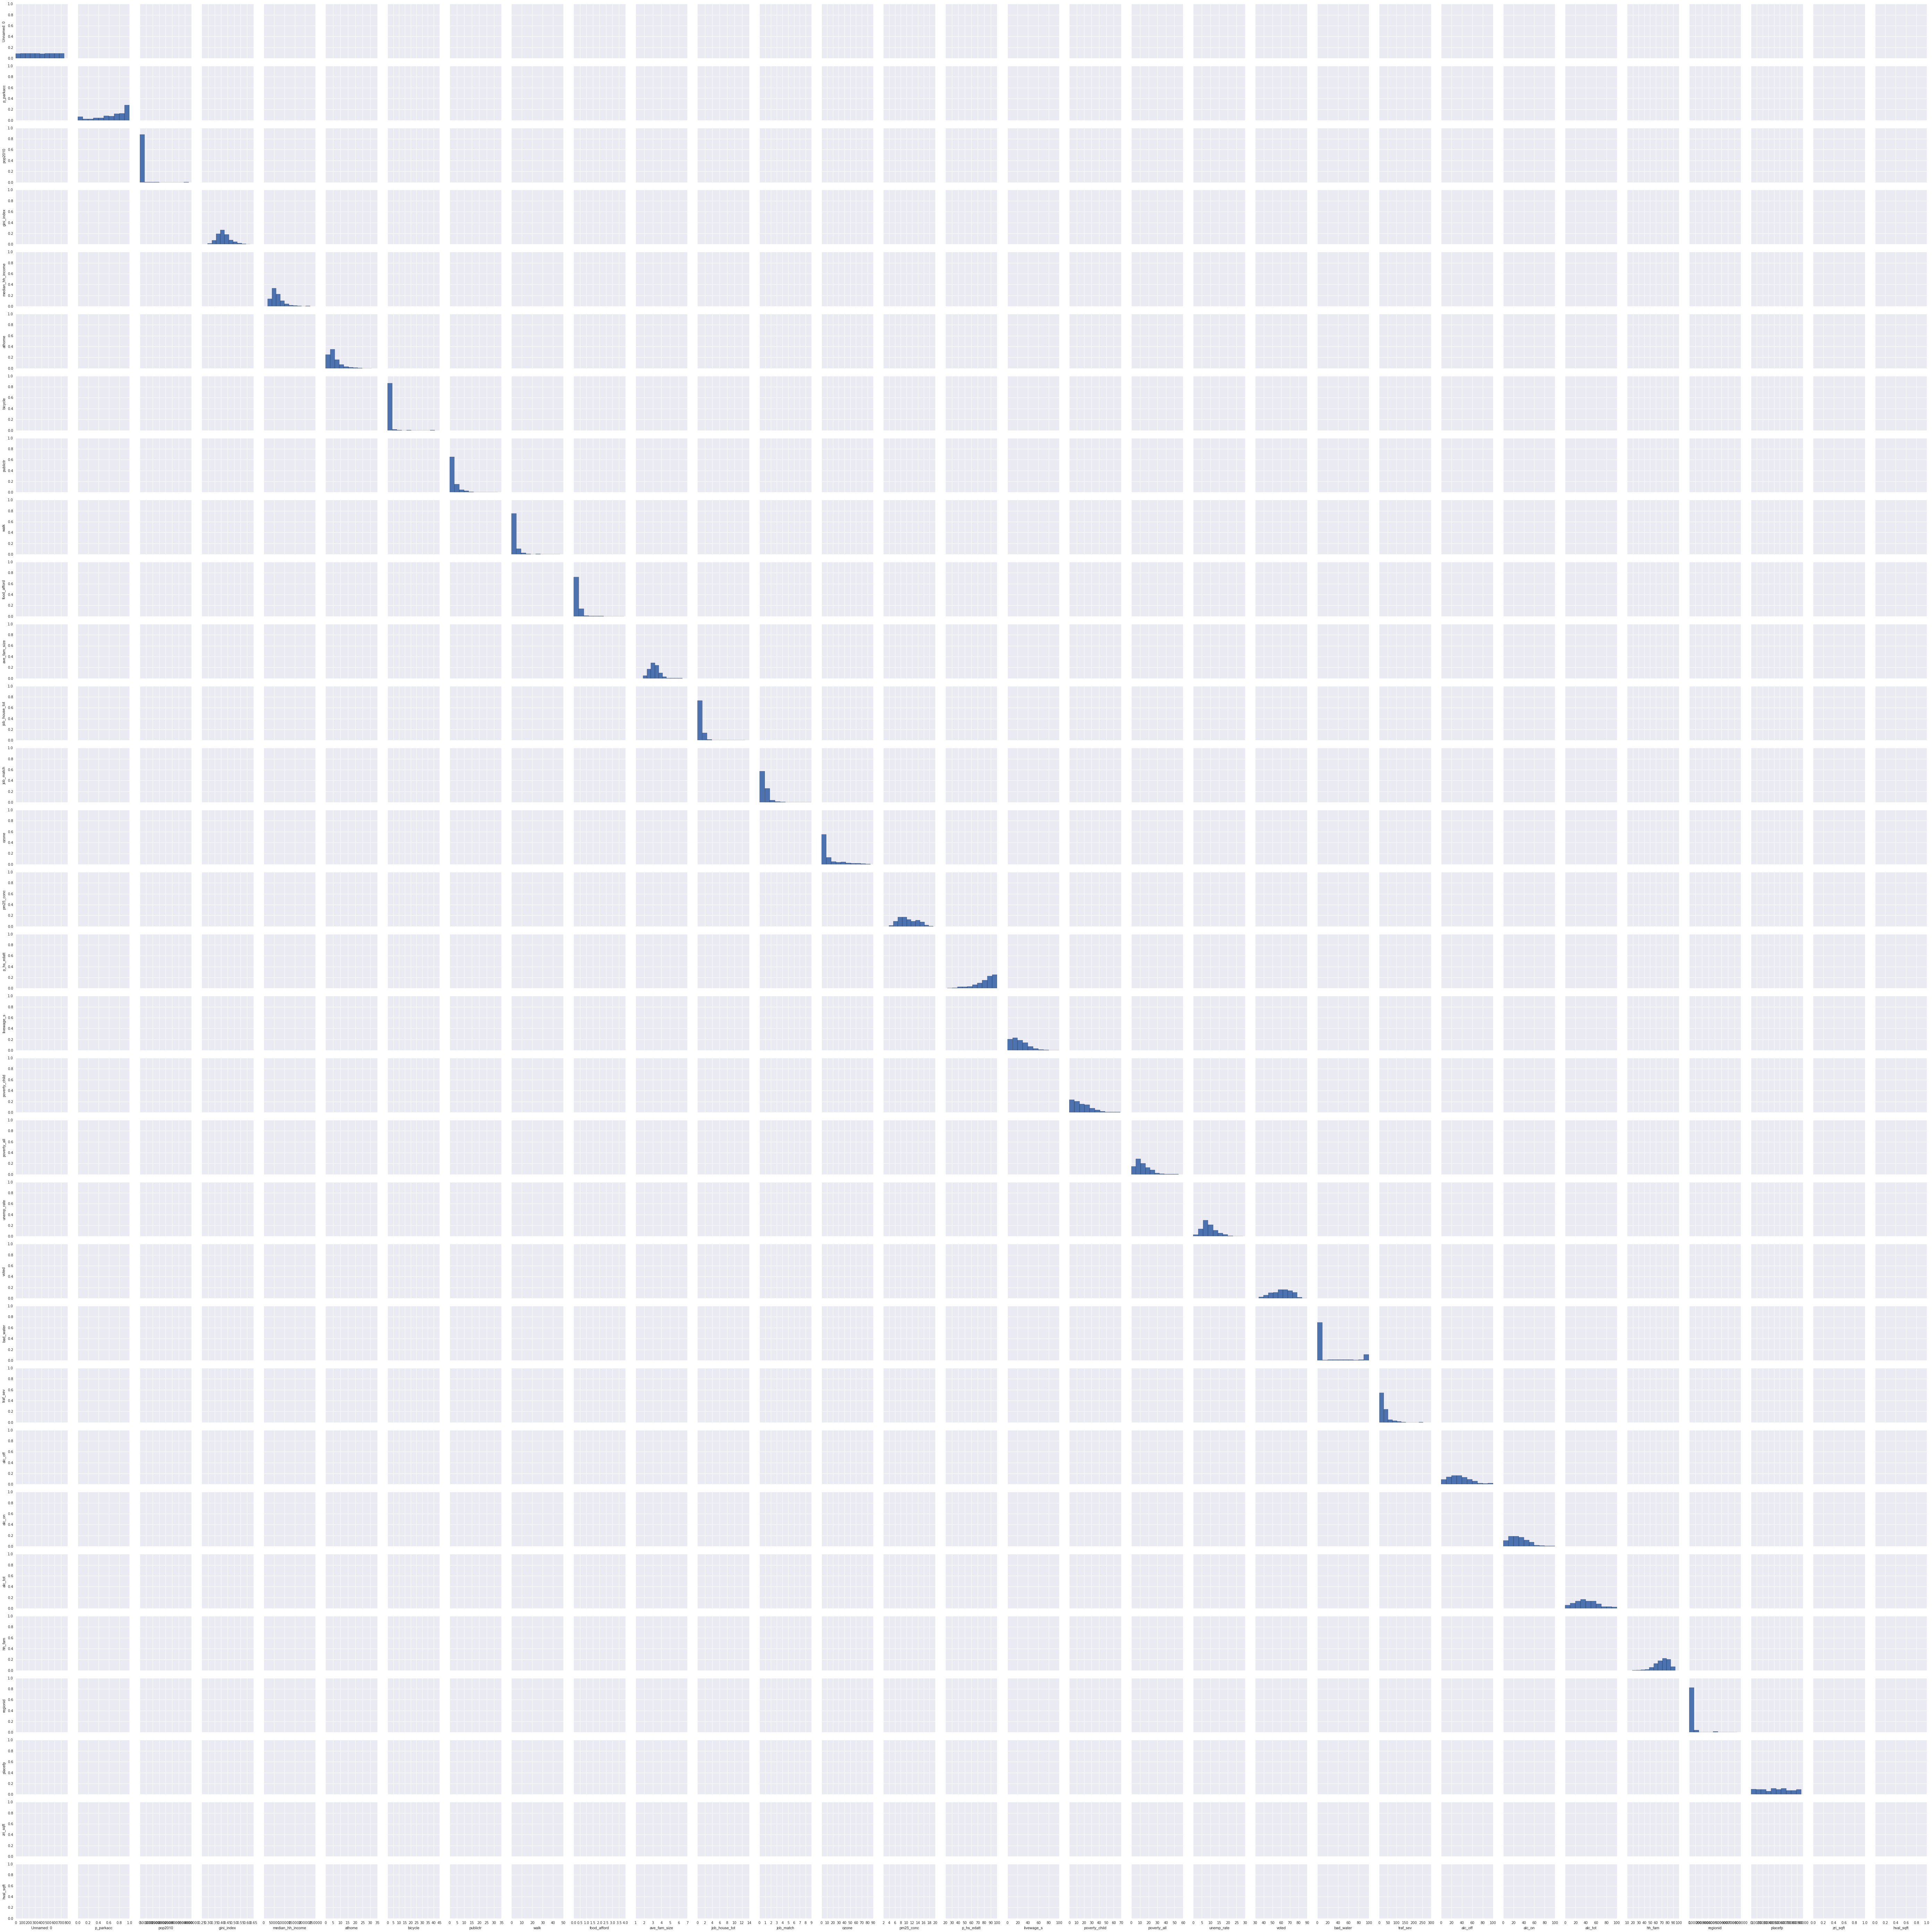

In [127]:
import seaborn as sns

sns.pairplot(cahouse);